In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow import keras
import tensorflow as tf

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Deep-Learning/master/Data_Sets/diamonds.csv")

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
data.shape

(53940, 10)

In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [10]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [11]:
data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [12]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['color']= label_encoder.fit_transform(data['color']) 
data['color'].unique()

data['cut']= label_encoder.fit_transform(data['cut']) 
data['cut'].unique() 

data['clarity']= label_encoder.fit_transform(data['clarity']) 
data['clarity'].unique() 


array([3, 2, 4, 5, 7, 6, 0, 1])

In [13]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [22]:
train_dataset.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

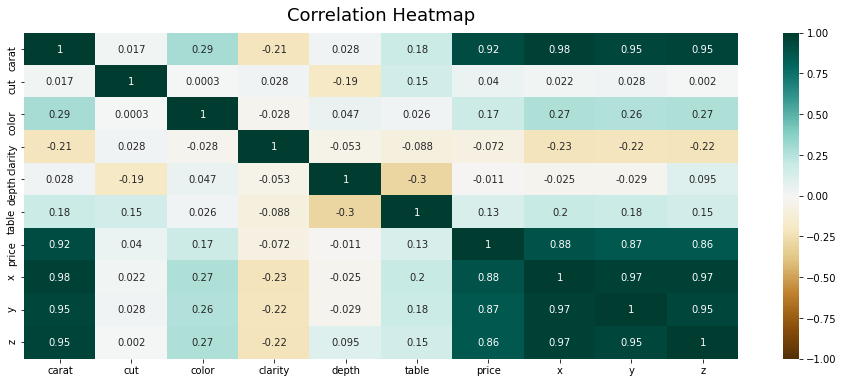

In [15]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap1.png', dpi=300, bbox_inches='tight')

In [16]:
train_dataset=data.sample(frac=0.8,random_state=0)
test_dataset=data.drop(train_dataset.index)

In [17]:
print(train_dataset.shape)
print(test_dataset.shape)

(43152, 10)
(10788, 10)


In [18]:
train_stats=train_dataset.describe()
train_stats.pop('price')
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
carat,43152.0,0.797184,0.473724,0.2,0.40,0.70,1.04,5.01
cut,43152.0,2.554042,1.026812,0.0,2.00,2.00,3.00,4.00
color,43152.0,2.600459,1.706301,0.0,1.00,3.00,4.00,6.00
clarity,43152.0,3.839845,1.726497,0.0,2.00,4.00,5.00,7.00
depth,43152.0,61.747900,1.430988,43.0,61.00,61.80,62.50,79.00
table,43152.0,57.455726,2.233570,44.0,56.00,57.00,59.00,95.00
x,43152.0,5.728950,1.122392,0.0,4.71,5.69,6.54,10.74
y,43152.0,5.732241,1.142865,0.0,4.72,5.71,6.53,58.90
z,43152.0,3.537722,0.708590,0.0,2.91,3.52,4.03,31.80


In [19]:
train_labels=train_dataset.pop('price')
test_labels=test_dataset.pop('price')

In [20]:
print(train_labels.shape)
print(test_labels.shape)

(43152,)
(10788,)


In [21]:
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

In [23]:
len(train_dataset.keys())

9

In [24]:
def build_model():
    model=keras.Sequential([
        layers.Dense(64,activation='relu',input_shape=[len(train_dataset.keys())]),## input layer
        layers.Dense(64,activation='relu'),## hidden layer
        layers.Dense(1)#output
        
      ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,metrics=['mae','mse',])
    return model

In [25]:
model=build_model()
model

In [26]:
example_batch=normed_train_data[:10]
example_result=model.predict(example_batch)
example_result

array([[-0.20049103],
       [ 0.03501017],
       [ 0.03963986],
       [ 0.18371004],
       [-0.27508897],
       [ 0.21146226],
       [ 0.18631956],
       [-0.75818735],
       [-0.12675971],
       [-0.3330486 ]], dtype=float32)

In [27]:
EPOCHS = 2000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:16141397.0000,  mae:2520.9377,  mse:16141397.0000,  val_loss:2739165.0000,  val_mae:951.1882,  val_mse:2739165.0000,  
....................................................................................................
Epoch: 100, loss:783258.6250,  mae:426.7415,  mse:783258.6250,  val_loss:5180120.5000,  val_mae:436.1267,  val_mse:5180120.5000,  
....................................................................................................
Epoch: 200, loss:465146.0312,  mae:352.6455,  mse:465146.0312,  val_loss:5816204.5000,  val_mae:367.5631,  val_mse:5816204.5000,  
....................................................................................................
Epoch: 300, loss:401623.3438,  mae:333.7145,  mse:401623.3438,  val_loss:6683608.0000,  val_mae:349.1774,  val_mse:6683608.0000,  
....................................................................................................
Epoch: 400, loss:338499.5625,  mae:312.5018,  mse:338499.5625,  val_

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,1.614140e+07,2520.937744,1.614140e+07,2739165.000,951.188171,2739165.000,0
1,1.721248e+06,793.842590,1.721248e+06,2010611.125,732.769714,2010611.125,1
2,1.520571e+06,728.085083,1.520571e+06,1952578.375,702.759583,1952578.375,2
3,1.482903e+06,714.804138,1.482903e+06,1976436.375,698.395508,1976436.375,3
4,1.463683e+06,707.488342,1.463683e+06,2001641.125,695.456360,2001641.125,4


In [29]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1995,270739.40625,286.164093,270739.40625,1411739.500,304.454651,1411739.500,1995
1996,270993.12500,285.825928,270993.12500,1489191.250,301.846405,1489191.250,1996
1997,271420.84375,286.382477,271420.84375,1411952.750,311.891388,1411952.750,1997
1998,270882.31250,286.863922,270882.31250,1381405.125,314.511047,1381405.125,1998
1999,269690.81250,286.339355,269690.81250,1521424.750,309.610809,1521424.750,1999


In [30]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter

Text(0, 0.5, 'MAE [Price]')

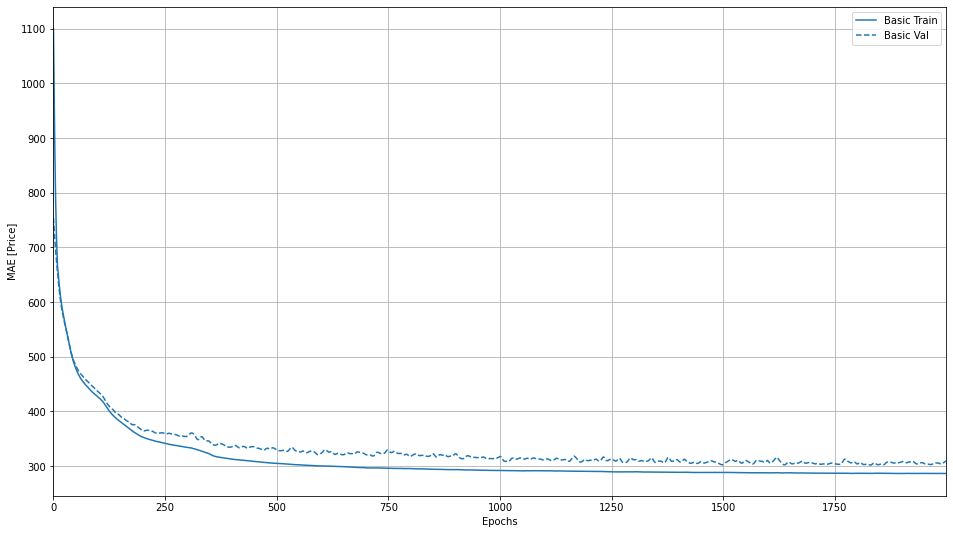

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plotter.plot({'Basic': history}, metric = "mae")
#plt.ylim([0, 10])
plt.ylabel('MAE [Price]')

Text(0, 0.5, 'MSE [Price^2]')

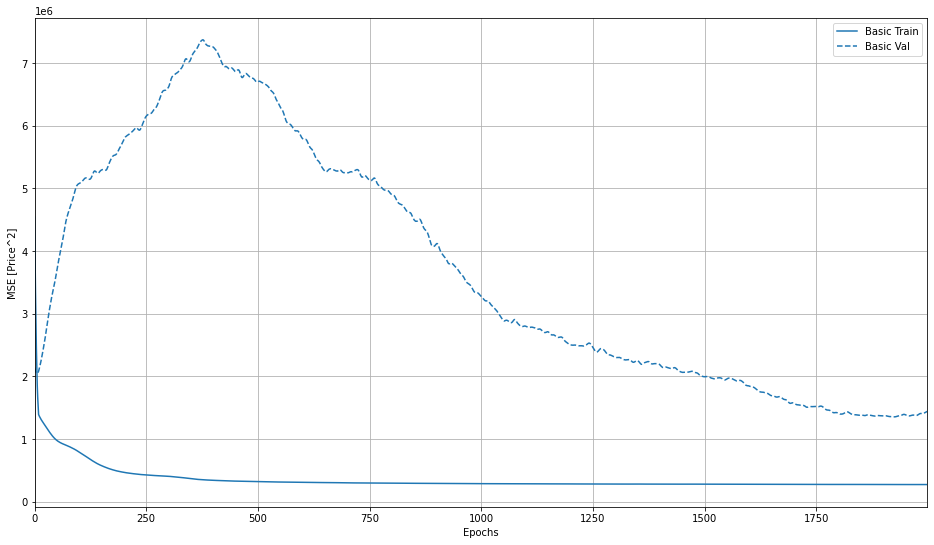

In [32]:
plt.figure(figsize=(16,9))
plotter.plot({'Basic': history}, metric = "mse")
#plt.ylim([0, 20])
plt.ylabel('MSE [Price^2]')

In [33]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:17295520.0000,  mae:2681.2173,  mse:17295520.0000,  val_loss:3051276.7500,  val_mae:1034.4841,  val_mse:3051276.7500,  
...............

Text(0, 0.5, 'MAE [Price]')

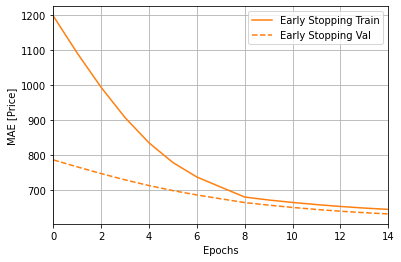

In [34]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
#plt.ylim([0, 10])
plt.ylabel('MAE [Price]')

In [35]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:10.2f} Price".format(mae))

338/338 - 0s - loss: 1430567.1250 - mae: 634.9647 - mse: 1430567.1250
Testing set Mean Abs Error:     634.96 Price


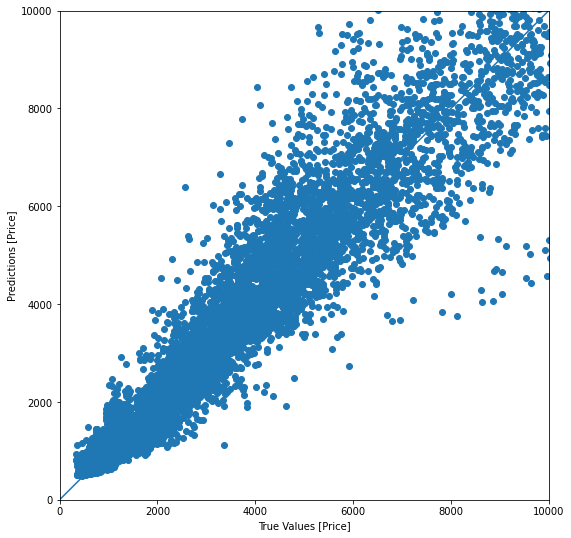

In [41]:
test_predictions = model.predict(normed_test_data).flatten()
plt.figure(figsize=(16,9))
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 10000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

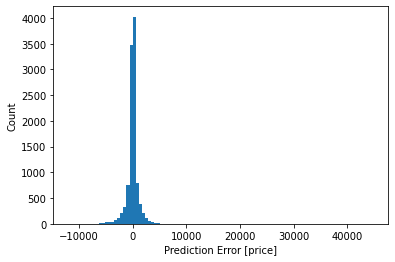

In [38]:
error = test_predictions - test_labels
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [price]")
_ = plt.ylabel("Count")